## Image Processing - scc0251
### Assignment 02 - Image Enhancement and Filtering
### Method 2 - Unsharp mask using the Laplacian Filter
Authors: Alexis J. Vargas ,   Karelia A. Vilca



In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

### 1. Functions
#### A) General functions
- ##### Image padding
Adds a zeros outline to the image, the number of zeros is the kernel size divided by 2 (floor)

In [2]:
def padding_img(img,padding):
    """Function that returns padded image
    Arguments:
        img -- input image
        padding -- number of zeros = kernel.shape/2
    """    
    new_img = np.zeros((img.shape[0]+padding*2, img.shape[1]+padding*2))
    ni_n, ni_m = new_img.shape
    new_img[padding:ni_n-padding, padding:ni_m-padding] = img
    return ( new_img )

- ##### Root Mean Squared Error
Rounding to 4 decimal places
$$RSE = \sqrt{\sum_{i}\sum_{j}(m(i,j)-r(i,j))^2} $$

In [3]:
def rsr(img1,img2):
    return ( round (np.sqrt(sum(sum((img1 - img2)**2))),4) )

- ##### Normalization
Scaling the image, using normalization(0 - 255), formula considered in the guideline
$$I = \frac{(I-min(I))*255}{max(I)} $$

In [4]:
def normalization(img):
    #return (((img-np.min(img))*255)/(np.max(img)))
    return ((img-np.min(img))/(np.max(img)-np.min(img)))*255 #real normalization

#### B) Method 2 - Unsharp mask using the Laplacian Filter

In [5]:
def M2_unsharp(img,c,k):
    """Function to perform Unsharp mask using the Laplacian Filter
    Arguments:
        img -- input image
        c -- parameter float
        k -- kernel 1 or 2 
    """    
    #0. Choose the kernel and padding the image
    if k == 1:
        kernel = np.matrix([[0,-1, 0], [-1, 4, -1], [0, -1, 0]])
    else:
        kernel = np.matrix([[-1,-1,-1], [-1, 8, -1], [-1, -1, -1]])
    padding = int(np.floor(kernel.shape[0]/2))
    new_img = padding_img(img,padding)    
    #1. Convolving each pixel of the subsection of the image with the chosen kernel
    If = np.zeros(img.shape)
    for i in range(padding, new_img.shape[0] - padding):
        for j in range(padding, new_img.shape[1] - padding):
            sub_img = new_img[ i-1 : i+2 , j-1:j+2 ]
            If[i-padding][j-padding] = np.sum(np.multiply(kernel,sub_img)) 
    #2. Scaling usig normalization          
    If = normalization(If)
    #3. Adding filtered image, multipliyed by parameter c, back to original          
    f = c*If+img
    #4. Scaling usig normalization            
    f = normalization(f)
    return(f)

### 2. Example - Unsharp mask using the Laplacian Filter
#### A) Consider test case number 3
- arara.png
- 2
- 0
- 0.5
- 1

Error:  2519.4489


(-0.5, 299.5, 299.5, -0.5)

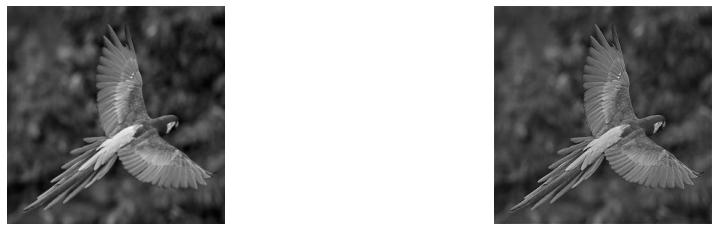

In [6]:
img = imageio.imread('../images/arara.png').astype(np.int32)
c = 0.5
k = 1
output_img = M2_unsharp(img,c,k)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

The second picture shows a blurred version of original image.

####  B) Consider test case number 4
- arara.png 
- 2 
- 0
- 0.75
- 2

Error:  3664.368


(-0.5, 299.5, 299.5, -0.5)

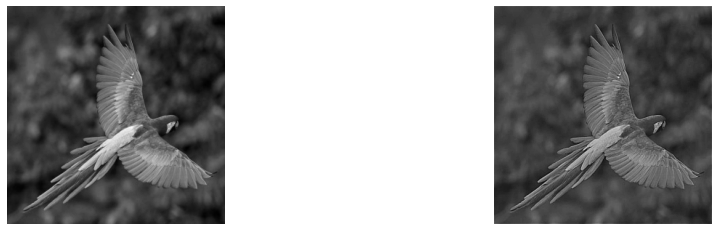

In [7]:
img = imageio.imread('../images/arara.png').astype(np.int32)
c = 0.75
k = 2
output_img = M2_unsharp(img,c,k)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')